#Throughput metrics part. 2

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
422/422 [==============================] - 54s 113ms/step - loss: 0.3232 - accuracy: 0.9017 - val_loss: 0.0664 - val_accuracy: 0.9787
Epoch 2/10
422/422 [==============================] - 41s 96ms/step - loss: 0.1000 - accuracy: 0.9699 - val_loss: 0.0426 - val_accuracy: 0.9860
Epoch 3/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0744 - accuracy: 0.9788 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 4/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0588 - accuracy: 0.9825 - val_loss: 0.0370 - val_accuracy: 0.9885
Epoch 5/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0346 - val_accuracy: 0.9913
Epoch 6/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 7/10
422/422 [==============================] - 41s 97ms/step -

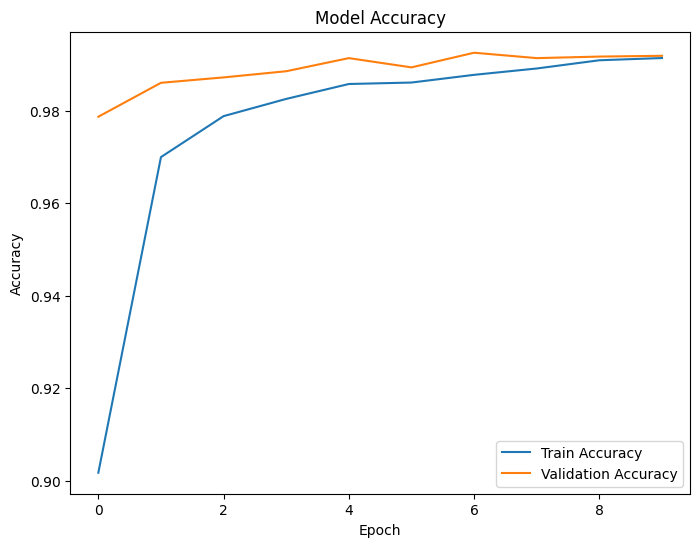

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize input images
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#ISO 25010

#Functional Suitability

Percentage of correctly classified digits on test data

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.0224 - accuracy: 0.9926
Test Accuracy: 99.26%


#Performance Efficiency

Training time and inference latency.

In [ ]:
import time

# Measure training time per epoch
start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)
end_time = time.time()

# Calculate and print training time per epoch
total_training_time = end_time - start_time
training_time_per_epoch = total_training_time / len(history.history['loss'])
print(f"Total Training Time: {total_training_time:.2f} seconds")
print(f"Training Time per Epoch: {training_time_per_epoch:.2f} seconds")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
422/422 [==============================] - 41s 96ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0382 - val_accuracy: 0.9912
Epoch 2/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0308 - val_accuracy: 0.9917
Epoch 3/10
422/422 [==============================] - 40s 95ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0313 - val_accuracy: 0.9918
Epoch 4/10
422/422 [==============================] - 40s 94ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0328 - val_accuracy: 0.9918
Epoch 5/10
422/422 [==============================] - 39s 93ms/step - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0332 - val_accuracy: 0.9927
Epoch 6/10
422/422 [==============================] - 39s 94ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0342 - val_accuracy: 0.9918
Epoch 7/10
422/422 [==============================] - 40s 95ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0322 - val_accuracy:

In [ ]:
import time
start_time = time.time()
model.predict(np.expand_dims(x_test[0], axis=0))
print(f"Inference Latency: {time.time() - start_time:.4f} seconds")

1/1 [==============================] - 0s 399ms/step
Inference Latency: 0.6476 seconds


#Compatibility

Dependency Management

In [ ]:
import subprocess

# Run pip freeze command to capture installed packages
result = subprocess.run(['pip', 'freeze'], stdout=subprocess.PIPE)
installed_packages = result.stdout.decode('utf-8').strip().split('\n')

# Write installed packages to requirements.txt file
with open('requirements.txt', 'w') as f:
    f.write('\n'.join(installed_packages))

In [ ]:
!cat requirements.txt

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
asttokens==2.4.1
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.5
cufflinks==0.17.3
cup

#Usability

Documentation Completeness and Clarity

In [ ]:
!sphinx-quickstart

Welcome to the Sphinx 5.0.2 quickstart utility.

Please enter values for the following settings (just press Enter to
accept a default value, if one is given in brackets).

Selected root path: .

You have two options for placing the build directory for Sphinx output.
Either, you use a directory "_build" within the root path, or you separate
"source" and "build" directories within the root path.
> Separate source and build directories (y/n) [n]: y

The project name will occur in several places in the built documentation.
> Project name: mnist
> Author name(s): aaron
> Project release []: 1.0

If the documents are to be written in a language other than English,
you can select a language here by its language code. Sphinx will then
translate text that it generates into that language.

For a list of supported codes, see
https://www.sphinx-doc.org/en/master/usage/configuration.html#confval-language.
> Project language [en]: en

Creating file /content/source/conf.py.
Creating file /content/sou

In [ ]:
!cd /content/source

In [ ]:
!make html

Running Sphinx v5.0.2
making output directory... done
building [mo]: targets for 0 po files that are out of date
building [html]: targets for 1 source files that are out of date
updating environment: [new config] 1 added, 0 changed, 0 removed
reading sources... [100%] index
looking for now-outdated files... none found
pickling environment... done
checking consistency... done
preparing documents... done
writing output... [100%] index
generating indices... genindex done
writing additional pages... search done
copying static files... done
copying extra files... done
dumping search index in English (code: en)... done
dumping object inventory... done
build succeeded.

The HTML pages are in build/html.


In [ ]:
# Specify the path to the HTML file
html_file_path = '/content/build/html/genindex.html'

# Read the HTML file content
with open(html_file_path, 'r') as html_file:
    html_content = html_file.read()

# Display the HTML content
from IPython.display import HTML
HTML(html_content)

In [ ]:
%%writefile nn_model.py

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize input images
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Writing nn_model.py


#Reliability

In [ ]:
!pip install radon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.9 MB/s eta 0:00:00


In [ ]:
import radon
from radon.complexity import cc_visit

# Define the path to the nn_model.py script
script_path = '/content/nn_model.py'

# Read the content of the script
with open(script_path, 'r') as f:
    script_content = f.read()

# Calculate Cyclomatic Complexity
complexity_results = cc_visit(script_content)

# Extract overall complexity metric
overall_complexity = sum([result.complexity for result in complexity_results])

print(f"Overall Cyclomatic Complexity: {overall_complexity}")

Overall Cyclomatic Complexity: 0


#Security

Vulnerability Assessment

In [ ]:
!pip install bandit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
!bandit -r /content/nn_model.py

[main]	INFO	profile include tests: None
[main]	INFO	profile exclude tests: None
[main]	INFO	cli include tests: None
[main]	INFO	cli exclude tests: None
[main]	INFO	running on Python 3.10.12
Run started:2024-04-22 17:02:11.198574

Test results:
	No issues identified.

Code scanned:
	Total lines of code: 32
	Total lines skipped (#nosec): 0

Run metrics:
	Total issues (by severity):
		Undefined: 0
		Low: 0
		Medium: 0
		High: 0
	Total issues (by confidence):
		Undefined: 0
		Low: 0
		Medium: 0
		High: 0
Files skipped (0):


#Maintainability

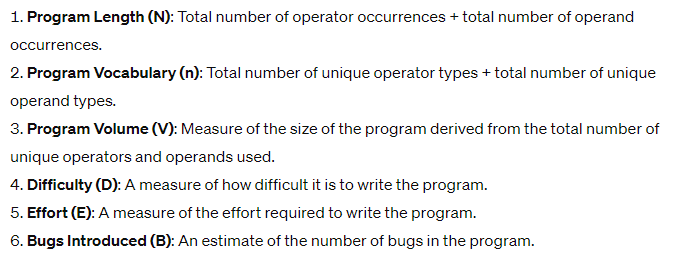

In [ ]:
!radon hal /content/nn_model.py

/content/nn_model.py:
    h1: 2
    h2: 4
    N1: 4
    N2: 6
    vocabulary: 6
    length: 10
    calculated_length: 10.0
    volume: 25.84962500721156
    difficulty: 1.5
    effort: 38.77443751081734
    time: 2.1541354172676304
    bugs: 0.00861654166907052


#Portability

Platform Independence

#Reusability

Modular Design

#Testability

Code Coverage

In [ ]:
!pip install pytest coverage

In [ ]:
%%writefile test_nn_model.py
import nn_model

def test_model_accuracy():
    assert nn_model.test_acc >= 0.9  # Example assertion for test accuracy

Writing test_nn_model.py


In [ ]:
!coverage run -m pytest test_nn_model.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0
rootdir: /content
plugins: anyio-3.7.1
collected 1 item                                                                                   

test_nn_model.py .                                                                           [100%]

================================== 1 passed in 397.28s (0:06:37) ===================================
